# Cloud Computing Assignment 3
## MSc Business Analytics - Group A8 - A.Y. 2022/2023
### Haifa Abdullah M Alghamdi, Maximilian Bremer, Swan Htet, Alejandro Luque, Giuliano Oscar Stefanelli

<div class="alert alert-warning"> <b>NOTE:</b> You do not have to worry about installing a webdriver and providing a path to the folder where you stored it, as our code will automatically install one for you.  
</div>

<b>Premilinary steps:</b>

We first need to import some libraries, in particular: 

- Selenium: which we will use to scrape the webpages dynamically
- Time: which we will use to set some time.sleep()

> Make sure you have all the libraries installed, we commented the ones you may have to install 

In [1]:
#importing the libraries
#!pip install webdriver_manager

import time
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
import tqdm
import pandas as pd
import numpy as np

<div class="alert alert-block alert-danger"><b>NOTE:</b> For the bonus question, if we try to convert dates to datetime type in our dataframe, we would encounter an error because the Wallapop website is in Spanish and thus, for example, abbreviates the month of Decemember as 'dic' and not 'dec'. This could be a problem because our locale is not set to Spanish, but to English. </div>

In [2]:
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')

'es_ES.UTF-8'

## Let's start scraping!

<div class="alert alert-block alert-info"><b>Q1:</b> Your code should initialize a Chrome web driver and access the Wallapop webpage.</div>

<div class="alert alert-block alert-info"><b>Q2:</b> From here, it should use the searchbox to look for all results matching the keyword “bicicleta”.</div>

<div class="alert alert-block alert-info"><b>Q3:</b> Under the different search options provided, your code should only access those entries in the category “Bicicletas”.</div>

With the code in the cell below, we answer Q1 to Q3: 

- We initialize the webdriver by first installing it so you do not have to provide a path and then open it.
- We direct to the home page of Wallapop and accept the cookies.
- We look for bikes under the right category.

In [105]:
#initializing the driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Maximize Window
driver.maximize_window() 
driver.minimize_window() 
driver.maximize_window() 
driver.switch_to.window(driver.current_window_handle)
driver.implicitly_wait(10)

# Enter to the site

driver.get('https://es.wallapop.com/')

# find and accept cookies
cookies = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Confirm suggested preferences")]')))
cookies.click()


#finding the search bar + searching for bikes under the right category

driver.find_element(By.CLASS_NAME, 'Search__input-wrapper').click()

searchbox = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//input[@placeholder='Buscar en Todas las categorías']")))
searchbox.clear()
searchbox.send_keys("bicicleta")
suggestions = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH,'//ul[@class="Search__list"]')))
suggestions.find_element(By.XPATH, '//li[@class="Search__suggestion"][@data-category-name="Bicicletas"]').click()



/var/folders/53/m1v1l27129d3yhx63rpz4ypm0000gn/T/ipykernel_22210/1882145802.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


<div class="alert alert-block alert-info"><b>Q4-a:</b> You should only retrieve results in “España, Barcelona” and narrow down the search to a maximum of “10km”.</div>

We first access the location filter, clear the current input, type the desired location and select the first option. Next, we click and drag the radius slider to the wanted value.

<div class="alert alert-block alert-info"><b>Q4-b:</b> Limit the price to 800€.</div>

We access the price filter and input '800' in right box corresponding to 'hasta'.

<div class="alert alert-block alert-info"><b>Q4-c:</b> Within the “Bicicletas” field, there are multiple subfields available. Narrow down your search to include only results in the “Bicicletas y triciclos” subfield. </div>

We create a list with the desired subcategories to then use it to look for them among all the subcategories Wallapop has.

<div class="alert alert-block alert-info"><b>Q4-d:</b> Only include those results that correspond to bikes that are “Nuevo” (New), “Como nuevo” (As good as new) and “En buen estado” (In good condition). </div>

Finally, we access the state filter and select the first three options that correspond to what is asked.



> NOTE: Selenium will do all the work for you and apply the filters one by one. However, if anything goes wrong, we implemented an "except" condtion that will take you directly to the page with all the filters applied.

In [106]:
# Setting max price to 800

try:
    price_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Precio")]')))
    price_bubble.click()
    price_dropdown = driver.find_element(By.XPATH, '//div[@class="FilterTemplate__dropdown FilterTemplate__dropdown--opened"]')
    price_limit = price_dropdown.find_element(By.XPATH, '//input[@placeholder="Sin límite"]')
    price_limit.clear()
    price_limit.send_keys("800")
    time.sleep(2)
    price_aplicar = price_dropdown.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    price_aplicar.click()
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters')

In [107]:

try:
# Setting location of product
    location_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "España, Madrid")]')))
    location_bubble.click()
    driver.implicitly_wait(5)
    location_searchbox = driver.find_element(By.XPATH, "//div[@class='FilterTemplate__dropdown FilterTemplate__dropdown--opened']")
    location = location_searchbox.find_element(By.XPATH, "//div[@class='LocationFilter__search']")
    location.click()
    time.sleep(2)
    location_box = location.find_element(By.CSS_SELECTOR, '.LocationFilter__input')
    time.sleep(2)
    location_box.clear()
    location_box.send_keys('España, Barcelona')
    location_dropdown = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//ngb-typeahead-window[@class="dropdown-menu show ng-star-inserted"]')))
    location_dropdown.find_element(By.XPATH, '//div[@class="SearchBox__suggestion d-flex flex-column justify-content-center ng-star-inserted"]').click()
    driver.implicitly_wait(5)
    
    element= driver.find_element(By.XPATH, "/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[3]/tsl-filter-host/div/tsl-location-filter/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-slider-form/form/ngx-slider/span[5]")
    km= driver.find_element(By.XPATH,"/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[3]/tsl-filter-host/div/tsl-location-filter/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-slider-form/form/ngx-slider/span[5]")
    while km != '10':
        action = webdriver.ActionChains(driver)
        action.move_to_element(element)
        action.drag_and_drop_by_offset(element, -50,0)
        action.perform()
        km= driver.find_element(By.XPATH,"/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[3]/tsl-filter-host/div/tsl-location-filter/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-slider-form/form/ngx-slider/span[9]").text.strip('km')

    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000')


<div class="alert alert-block alert-info"><b>Q5:</b> Considering all the different combinations among the options above ("Bicicletas de carretera" and "Nuevo", "Bicicletas de carretera" and "En buen estado", etc.), retrieve the following information for all the available results (if less than 250) or for the first 250 results (if more than 250):Exclude all results corresponding to adds:

    The URL address to the post
    The URL address to the displayed image
    The title of the post
    The price
    The full description (as shown in the results page)
</div>




While the filters for price and location can remain the same, we will need to change the subcategory and state retrieving a maximum of 250 (if possible) for the following nine combinations: 

|Combination number| Type | State |
| ---   | --- | --- |
|  1  | Bicicletas de carretera | Nuevo
|   2 | Bicicletas de carretera | Como nuevo |
| 3   | Bicicletas de carretera| En buen estado |
| 4   | MTB|  Nuevo
| 5   | MTB| Como nuevo |
| 6   | MTB| En buen estado |
| 7   | Bicicletas plegables | Nuevo
| 8   | Bicicletas plegables | Como nuevo |
 | 9  | Bicicletas plegables| En buen estado |
 


We will retrieve the information for these nine combinations and create 9 separate set of lists, and finally merge these 9 set of lists into one to data clean and dataframe creation.


We describe the steps for the first combination, as the others will follow the same logic.

## Combination 1: Bicicletas de carretera, Nuevo

In [5]:
# Setting subcategories
try:
    subcategories_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Subcategoría")]')))
    subcategories_bubble.click()
    subcategories_dropdown = driver.find_element(By.XPATH, '//div[@class="MultiSelectFilter__bubble"]')
    subcategories_dropdown.find_element(By.XPATH, '//p[@class="MultiSelectOption__label m-0 d-block"][contains(text(), "Bicicletas y triciclos")]').click()
    driver.implicitly_wait(5)

    categories_wanted = ['Bicicletas de carretera']
    all_categories = driver.find_elements(By.XPATH, '//div[@class="w-100 ng-star-inserted"]')
    checkbox = driver.find_elements(By.XPATH, '//tsl-checkbox-form[@class="d-flex align-self-center ng-untouched ng-pristine ng-valid ng-star-inserted"]')
    i = 0
    for i in range(len(all_categories)):
        if any(cat in all_categories[i].text for cat in categories_wanted):
            checkbox[i].click()
        else:
             pass
        i +=1

    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10438')

# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Estado del producto")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')

    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10438&condition=new')
    
    

We first load all the results until we reach 250 listings (if there are more than 250, if not it stops before). However, new listings are loaded by 40 in 40 so, if there are more than 250 listings in total, our loop will stop once a maximum of 280 listings are loaded. For this reason, if the length of the list containing all the listings is greater than 250, we will drop the last element until we reach len = 250. 
Moreover, the ads are automatically discarded because we telling Selenium to find elements with a specific class and ads do not have such class.

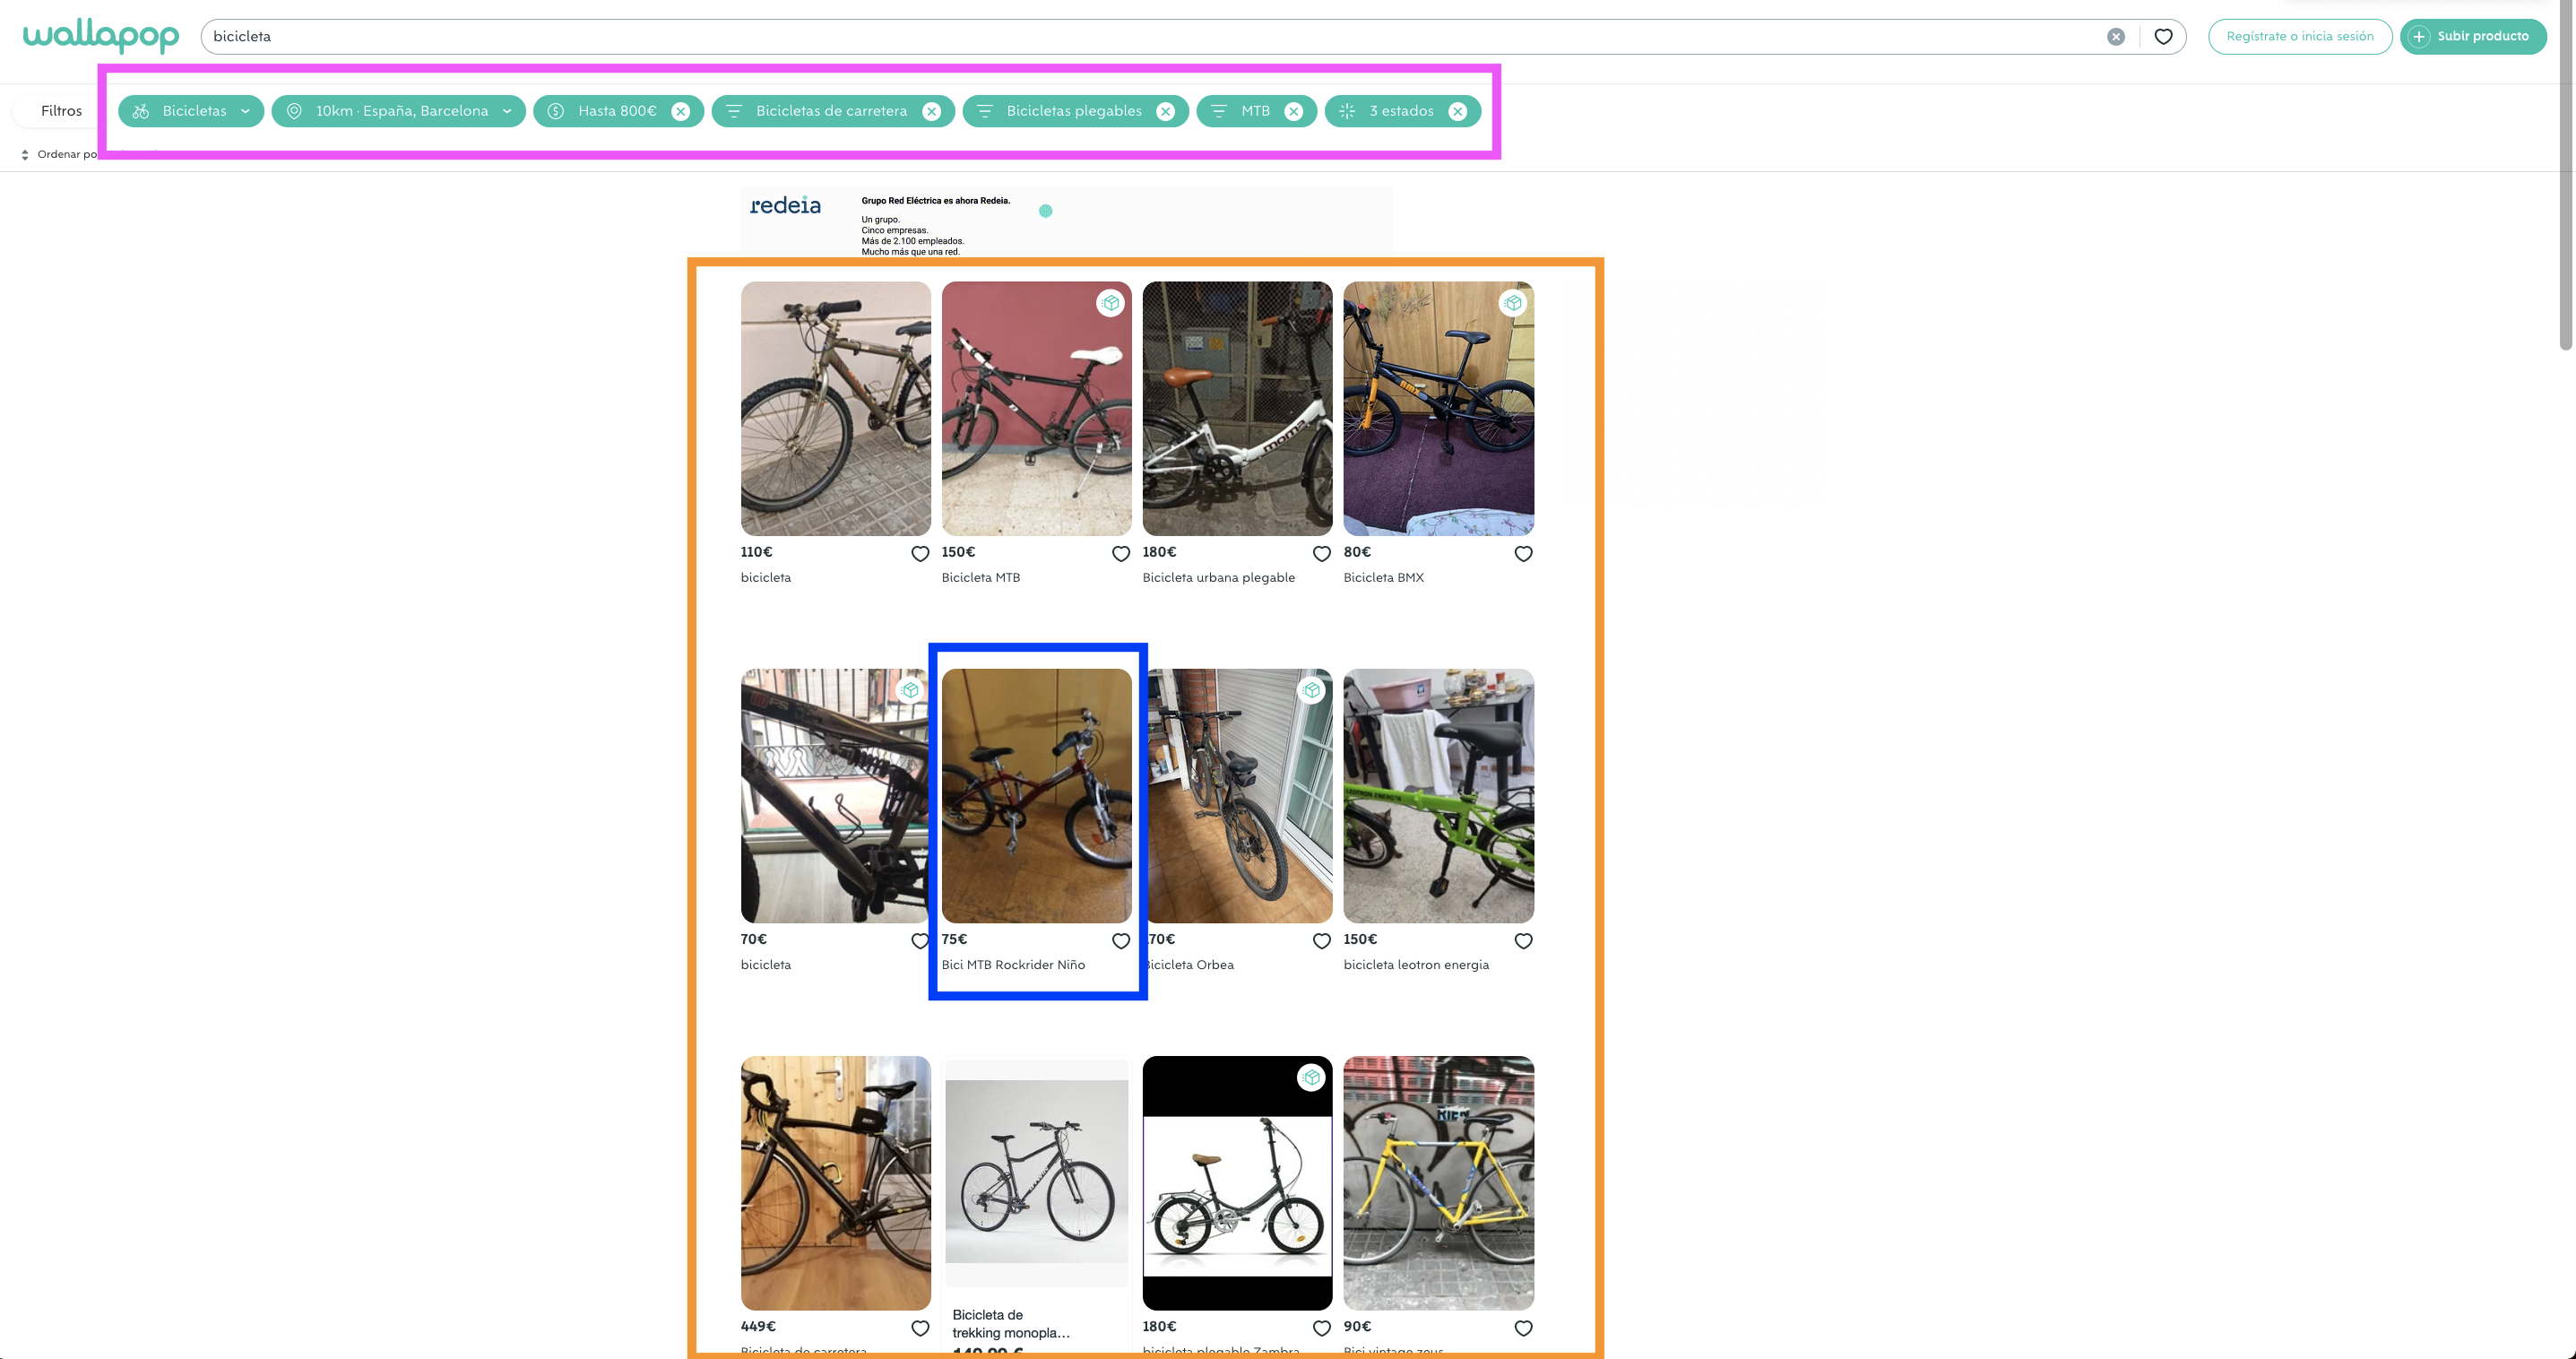

To give a little bit more of context:

- *listings_block* is the big box in organge.
- *bike_listings* is the smaller box in blue which we will use to retrieve the info for Part 1 and then click on it, acsess the individual page and retrieve the info per Part 2.

In [6]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        # scroll one screen height each time
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        # update scroll height 
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        # finish the loop when the height we need to scroll to is larger than the total scroll height
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

33

In [7]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings)

33

Now that we have our entire list loaded, we can retrieve all the information required. 

- From the results page, we can get:
       - The image URLs, stored in the list "image_URLs"
       - The prices of the bikes, stored in the list "prices"
       - The titles of the posts, stored in the list "titles"
       - The full descriptions of the posts, stored in the list "full_descr"

> NOTE: the URL of the posts cannot be accessed before opening the individual listing page.

<div class="alert alert-block alert-info"><b>Q7:</b>  Include an additional column “Type” including a reference to whether the considered record corresponds to a “Bicicleta de carretera”, a “Bicicleta plegable” or “MTB”. </div>
<div class="alert alert-block alert-info"><b>Q8:</b> Also include a column “State” to specify whether the considered bike is “Nuevo”, “Como nuevo” or “En buen estado”. </div>

- Now that we have these information, we can click on the individual posts and get: 
       - The URLs of the posts, stored in the list "post_URLs"
       - The type of the bikes, stored in the list "types"
       - The state of the bikes, stored in the list "states"
       - [BONUS] The date when the posts were made, stored in the list "dates"

In [8]:
post_URLs1 = [] #READY
image_URLs1 = []  #READY
titles1 = []  #READY
prices1 = [] #TO BE CLEANED (from string to float)
full_descr1 = []  #READY
types1 = []  #READY
states1 = []  #READY
dates1 = [] #TO BE CLEANED (from string to date)
size_letters_temp1 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs1.append(img.get_attribute('src'))
    except:
        image_URLs1.append(None)
    
    try: 
        prices1.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices1.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles1.append(title_descr[0].text)
        full_descr1.append(title_descr[1].text)
    except:
        titles1.append(None)
        full_descr1.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs1.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states1.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types1.append(extra_info[1].text)
        dates1.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp1.append(size_letter)
            if len(size) == 1:
                size_letters_temp1.append(size[0])
            elif len(size) == 0:
                size_letters_temp1.append(None)

        except:
            size_letters_temp1.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs1.append(None)
        states1.append(None)
        types1.append(None)
        dates1.append(None)
        size_letters_temp1.append(None)
        
        driver.close()
        driver.switch_to.window(p)                                      
                                                                    

100%|███████████████████████████████████████████| 33/33 [03:43<00:00,  6.77s/it]


Let's quickly check if the lists have the same length so we can correctly create a dataframe.

In [9]:
print(len(post_URLs1))
print(len(image_URLs1)) 
print(len(titles1))
print(len(prices1))
print(len(full_descr1)) 
print(len(types1))
print(len(states1))
print(len(dates1))
print(len(size_letters_temp1))

33
33
33
33
33
33
33
33
33


## Combination 2: Bicicletas de carretera, Como nuevo

In [10]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)
    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10438&condition=as_good_as_new')
    
    

In [16]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")  
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;") 
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

165

In [17]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings)       

165

In [18]:
post_URLs2 = [] #READY
image_URLs2 = []  #READY
titles2 = []  #READY
prices2 = [] #TO BE CLEANED (from string to float)
full_descr2 = []  #READY
types2 = []  #READY
states2 = []  #READY
dates2 = [] #TO BE CLEANED (from string to date)
size_letters_temp2 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs2.append(img.get_attribute('src'))
    except:
        image_URLs2.append(None)
    
    try: 
        prices2.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices2.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles2.append(title_descr[0].text)
        full_descr2.append(title_descr[1].text)
    except:
        titles2.append(None)
        full_descr2.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs2.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states2.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types2.append(extra_info[1].text)
        dates2.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp2.append(size_letter)
            if len(size) == 1:
                size_letters_temp2.append(size[0])
            elif len(size) == 0:
                size_letters_temp2.append(None)

        except:
            size_letters_temp2.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs2.append(None)
        states2.append(None)
        types2.append(None)
        dates2.append(None)
        size_letters_temp2.append(None)
        
        driver.close()
        driver.switch_to.window(p)                                      
                                                                    

100%|█████████████████████████████████████████| 165/165 [19:12<00:00,  6.98s/it]


In [19]:
print(len(post_URLs2))
print(len(image_URLs2)) 
print(len(titles2))
print(len(prices2))
print(len(full_descr2)) 
print(len(types2))
print(len(states2))
print(len(dates2))
print(len(size_letters_temp2))

165
165
165
165
165
165
165
165
165


## Combination 3: Bicicletas de carretera, En buen estado

In [20]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Como nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'en buen estado'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[3]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10438&condition=good')
    
    

In [21]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")  
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

274

In [22]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings)    

250

In [23]:
post_URLs3 = [] #READY
image_URLs3 = []  #READY
titles3 = []  #READY
prices3 = [] #TO BE CLEANED (from string to float)
full_descr3 = []  #READY
types3 = []  #READY
states3 = []  #READY
dates3 = [] #TO BE CLEANED (from string to date)
size_letters_temp3 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs3.append(img.get_attribute('src'))
    except:
        image_URLs3.append(None)
    
    try: 
        prices3.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices3.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles3.append(title_descr[0].text)
        full_descr3.append(title_descr[1].text)
    except:
        titles3.append(None)
        full_descr3.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs3.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states3.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types3.append(extra_info[1].text)
        dates3.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp3.append(size_letter)
            if len(size) == 1:
                size_letters_temp3.append(size[0])
            elif len(size) == 0:
                size_letters_temp3.append(None)

        except:
            size_letters_temp3.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs3.append(None)
        states3.append(None)
        types3.append(None)
        dates3.append(None)
        size_letters_temp3.append(None)
        
        driver.close()
        driver.switch_to.window(p)  

100%|█████████████████████████████████████████| 250/250 [29:12<00:00,  7.01s/it]


In [24]:
print(len(post_URLs3))
print(len(image_URLs3)) 
print(len(titles3))
print(len(prices3))
print(len(full_descr3)) 
print(len(types3))
print(len(states3))
print(len(dates3))
print(len(size_letters_temp3))

250
250
250
250
250
250
250
250
250


## Combination 4: MTB, Nuovo

In [25]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)

# Setting subcategories
try:
    subcategories_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Bicicletas de carretera")]')))
    subcategories_bubble.click()
    subcategories_dropdown = driver.find_element(By.XPATH, '//div[@class="MultiSelectFilter__bubble"]')
    subcategories_dropdown.find_element(By.XPATH, '//p[@class="MultiSelectOption__label m-0 d-block"][contains(text(), "Bicicletas y triciclos")]').click()
    driver.implicitly_wait(5)

    categories_wanted = ['Bicicletas de carretera', 'MTB'] #de-selecting bici de carretera and selecting MTB
    all_categories = driver.find_elements(By.XPATH, '//div[@class="w-100 ng-star-inserted"]')
    checkbox = driver.find_elements(By.XPATH, '//tsl-checkbox-form[@class="d-flex align-self-center ng-untouched ng-pristine ng-valid ng-star-inserted"]')
    i = 0
    for i in range(len(all_categories)):
        if any(cat in all_categories[i].text for cat in categories_wanted):
            checkbox[i].click()
        else:
             pass
        i +=1

    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10214')

# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "En buen estado")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'en buen estado'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[3]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10214&condition=new')
    
    

In [26]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")   
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

57

In [27]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

57

In [28]:
post_URLs4 = [] #READY
image_URLs4 = []  #READY
titles4 = []  #READY
prices4 = [] #TO BE CLEANED (from string to float)
full_descr4 = []  #READY
types4 = []  #READY
states4 = []  #READY
dates4 = [] #TO BE CLEANED (from string to date)
size_letters_temp4 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs4.append(img.get_attribute('src'))
    except:
        image_URLs4.append(None)
    
    try: 
        prices4.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices4.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles4.append(title_descr[0].text)
        full_descr4.append(title_descr[1].text)
    except:
        titles4.append(None)
        full_descr4.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs4.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states4.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types4.append(extra_info[1].text)
        dates4.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp4.append(size_letter)
            if len(size) == 1:
                size_letters_temp4.append(size[0])
            elif len(size) == 0:
                size_letters_temp4.append(None)

        except:
            size_letters_temp4.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs4.append(None)
        states4.append(None)
        types4.append(None)
        dates4.append(None)
        size_letters_temp4.append(None)
        
        driver.close()
        driver.switch_to.window(p)  

100%|███████████████████████████████████████████| 57/57 [06:43<00:00,  7.07s/it]


In [29]:
print(len(post_URLs4))
print(len(image_URLs4)) 
print(len(titles4))
print(len(prices4))
print(len(full_descr4)) 
print(len(types4))
print(len(states4))
print(len(dates4))
print(len(size_letters_temp4))

57
57
57
57
57
57
57
57
57


## Combination 5: MTB, Como nuevo

In [30]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)
    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10214&condition=as_good_as_new')
    

In [32]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")   
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

339

In [33]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

250

In [34]:
post_URLs5 = [] #READY
image_URLs5 = []  #READY
titles5 = []  #READY
prices5 = [] #TO BE CLEANED (from string to float)
full_descr5 = []  #READY
types5 = []  #READY
states5 = []  #READY
dates5 = [] #TO BE CLEANED (from string to date)
size_letters_temp5 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs5.append(img.get_attribute('src'))
    except:
        image_URLs5.append(None)
    
    try: 
        prices5.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices5.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles5.append(title_descr[0].text)
        full_descr5.append(title_descr[1].text)
    except:
        titles5.append(None)
        full_descr5.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs5.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states5.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types5.append(extra_info[1].text)
        dates5.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp5.append(size_letter)
            if len(size) == 1:
                size_letters_temp5.append(size[0])
            elif len(size) == 0:
                size_letters_temp5.append(None)

        except:
            size_letters_temp5.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs5.append(None)
        states5.append(None)
        types5.append(None)
        dates5.append(None)
        size_letters_temp5.append(None)
        
        driver.close()
        driver.switch_to.window(p) 

100%|█████████████████████████████████████████| 250/250 [30:19<00:00,  7.28s/it]


In [35]:
print(len(post_URLs5))
print(len(image_URLs5)) 
print(len(titles5))
print(len(prices5))
print(len(full_descr5)) 
print(len(types5))
print(len(states5))
print(len(dates5))
print(len(size_letters_temp5))

250
250
250
250
250
250
250
250
250


## Combination 6: MTB, en buen estado

In [36]:

# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Como nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'en buen estado'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[3]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10214&condition=good')
    
    

In [37]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")  
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height :
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")  
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

451

In [38]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

250

In [39]:
post_URLs6 = [] #READY
image_URLs6 = []  #READY
titles6 = []  #READY
prices6 = [] #TO BE CLEANED (from string to float)
full_descr6 = []  #READY
types6 = []  #READY
states6 = []  #READY
dates6 = [] #TO BE CLEANED (from string to date)
size_letters_temp6 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs6.append(img.get_attribute('src'))
    except:
        image_URLs6.append(None)
    
    try: 
        prices6.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices6.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles6.append(title_descr[0].text)
        full_descr6.append(title_descr[1].text)
    except:
        titles6.append(None)
        full_descr6.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs6.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states6.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types6.append(extra_info[1].text)
        dates6.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp6.append(size_letter)
            if len(size) == 1:
                size_letters_temp6.append(size[0])
            elif len(size) == 0:
                size_letters_temp6.append(None)

        except:
            size_letters_temp6.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs6.append(None)
        states6.append(None)
        types6.append(None)
        dates6.append(None)
        size_letters_temp6.append(None)
        
        driver.close()
        driver.switch_to.window(p) 

100%|█████████████████████████████████████████| 250/250 [30:08<00:00,  7.23s/it]


In [40]:
print(len(post_URLs6))
print(len(image_URLs6)) 
print(len(titles6))
print(len(prices6))
print(len(full_descr6)) 
print(len(types6))
print(len(states6))
print(len(dates6))
print(len(size_letters_temp6))

250
250
250
250
250
250
250
250
250


## Combination 7: Bicicletas plegables, nuevo

In [41]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)

# Setting subcategories
try:
    subcategories_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "MTB")]')))
    subcategories_bubble.click()
    subcategories_dropdown = driver.find_element(By.XPATH, '//div[@class="MultiSelectFilter__bubble"]')
    subcategories_dropdown.find_element(By.XPATH, '//p[@class="MultiSelectOption__label m-0 d-block"][contains(text(), "Bicicletas y triciclos")]').click()
    driver.implicitly_wait(5)

    categories_wanted = ['MTB', 'Bicicletas plegables'] #de-selecting bici de carretera and selecting MTB
    all_categories = driver.find_elements(By.XPATH, '//div[@class="w-100 ng-star-inserted"]')
    checkbox = driver.find_elements(By.XPATH, '//tsl-checkbox-form[@class="d-flex align-self-center ng-untouched ng-pristine ng-valid ng-star-inserted"]')
    i = 0
    for i in range(len(all_categories)):
        if any(cat in all_categories[i].text for cat in categories_wanted):
            checkbox[i].click()
        else:
             pass
        i +=1

    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10217')

# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "En buen estado")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'en buen estado'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[3]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    #selecting 'nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10217&condition=new')
    
    

In [42]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")  
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

50

In [43]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

50

In [44]:
post_URLs7 = [] #READY
image_URLs7 = []  #READY
titles7 = []  #READY
prices7 = [] #TO BE CLEANED (from string to float)
full_descr7 = []  #READY
types7 = []  #READY
states7 = []  #READY
dates7 = [] #TO BE CLEANED (from string to date)
size_letters_temp7 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs7.append(img.get_attribute('src'))
    except:
        image_URLs7.append(None)
    
    try: 
        prices7.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices7.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles7.append(title_descr[0].text)
        full_descr7.append(title_descr[1].text)
    except:
        titles7.append(None)
        full_descr7.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs7.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states7.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types7.append(extra_info[1].text)
        dates7.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp7.append(size_letter)
            if len(size) == 1:
                size_letters_temp7.append(size[0])
            elif len(size) == 0:
                size_letters_temp7.append(None)

        except:
            size_letters_temp7.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs7.append(None)
        states7.append(None)
        types7.append(None)
        dates7.append(None)
        size_letters_temp7.append(None)
        
        driver.close()
        driver.switch_to.window(p) 

100%|███████████████████████████████████████████| 50/50 [05:45<00:00,  6.92s/it]


In [45]:
print(len(post_URLs7))
print(len(image_URLs7)) 
print(len(titles7))
print(len(prices7))
print(len(full_descr7)) 
print(len(types7))
print(len(states7))
print(len(dates7))
print(len(size_letters_temp7))

50
50
50
50
50
50
50
50
50


## Combination 8: Bicicletas plegables, como nuevo

In [46]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)
    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[1]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10217&condition=as_good_as_new')
    

In [51]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")   
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")  
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

138

In [52]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

138

In [53]:
post_URLs8 = [] #READY
image_URLs8= []  #READY
titles8= []  #READY
prices8 = [] #TO BE CLEANED (from string to float)
full_descr8 = []  #READY
types8 = []  #READY
states8 = []  #READY
dates8 = [] #TO BE CLEANED (from string to date)
size_letters_temp8 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs8.append(img.get_attribute('src'))
    except:
        image_URLs8.append(None)
    
    try: 
        prices8.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices8.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles8.append(title_descr[0].text)
        full_descr8.append(title_descr[1].text)
    except:
        titles8.append(None)
        full_descr8.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs8.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states8.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types8.append(extra_info[1].text)
        dates8.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp8.append(size_letter)
            if len(size) == 1:
                size_letters_temp8.append(size[0])
            elif len(size) == 0:
                size_letters_temp8.append(None)

        except:
            size_letters_temp8.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs8.append(None)
        states8.append(None)
        types8.append(None)
        dates8.append(None)
        size_letters_temp8.append(None)
        
        driver.close()
        driver.switch_to.window(p) 

100%|█████████████████████████████████████████| 138/138 [16:39<00:00,  7.24s/it]


In [54]:
print(len(post_URLs8))
print(len(image_URLs8)) 
print(len(titles8))
print(len(prices8))
print(len(full_descr8)) 
print(len(types8))
print(len(states8))
print(len(dates8))
print(len(size_letters_temp8))

138
138
138
138
138
138
138
138
138


## Combination 9: Bicicletas plegables, en buen estado

In [55]:
# scroll to the top of the page
driver.find_element(By.TAG_NAME,'body').send_keys(Keys.CONTROL + Keys.HOME)
time.sleep(2)
# Setting states of product
try:
    status_bubble = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.XPATH, '//div[@class="Bubble__content"][contains(text(), "Como nuevo")]')))
    status_bubble.click()
    driver.implicitly_wait(5)

    options = driver.find_element(By.XPATH, '//tsl-multi-select-form[@class="ng-untouched ng-pristine ng-valid"]')
    #de-selecting 'como nuevo'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[2]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    #selecting 'en buen estado'
    options.find_element(By.XPATH, '/html/body/tsl-root/tsl-public/div/div/tsl-search/div/div/tsl-filters-wrapper/div/div[2]/tsl-filter-group/div/div[5]/tsl-filter-host/div/tsl-multi-select-filter/div/tsl-filter-template/div/div/div[2]/div/tsl-drawer-placeholder-template/div/div/form/tsl-multi-select-form/div[3]/tsl-multi-select-option/div/tsl-checkbox-form/label').click()
    time.sleep(2)
    aplicar = driver.find_element(By.CSS_SELECTOR, '.FilterTemplate__dropdown--opened > div:nth-child(3) > tsl-button:nth-child(2)')
    aplicar.click()
    
except:
    driver.get('https://es.wallapop.com/app/search?category_ids=17000&keywords=bicicleta&latitude=41.38804&longitude=2.17001&max_sale_price=800&filters_source=quick_filters&distance=10000&object_type_ids=10217&condition=good')
    
    

In [56]:
listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')

try:
    button = driver.find_element(By.XPATH, '//tsl-button[@id="btn-load-more"]').click()
    driver.execute_script("arguments[0].scrollIntoView();",button)
    
    driver.execute_script("arguments[0].click();",load_more)
    time.sleep(1)
    
    driver.execute_script("window.scrollTo(0,0);")
    screen_height = driver.execute_script("return window.screen.height;")   
    
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break      
        time.sleep(1)

except:
    screen_height = driver.execute_script("return window.screen.height;")  
    i = 1

    while True:
        listings_block = driver.find_element(By.XPATH, '//div[@class="ItemCardList grid-lg-4 grid-md-3 grid-sm-2 grid-xl-4 grid-xs-2 m-auto w-100"]')
        bike_listings = listings_block.find_elements(By.XPATH, '//a[@class="ItemCardList__item ng-star-inserted"]')
        driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i=i))  
        i += 1
        time.sleep(1)
        scroll_height = driver.execute_script("return document.body.scrollHeight;")  
        if (screen_height) * i > scroll_height:
            break            
        time.sleep(1)
        
len(bike_listings)

131

In [57]:
if len(bike_listings)>250:
    while len(bike_listings)!=250:
        bike_listings.pop()
len(bike_listings) 

131

In [58]:
post_URLs9 = [] #READY
image_URLs9= []  #READY
titles9= []  #READY
prices9 = [] #TO BE CLEANED (from string to float)
full_descr9 = []  #READY
types9 = []  #READY
states9 = []  #READY
dates9 = [] #TO BE CLEANED (from string to date)
size_letters_temp9 = [] #TO BE CLEANED

for item in tqdm.tqdm(bike_listings):
    
    p = driver.window_handles[0]
    driver.execute_script("arguments[0].scrollIntoView();",item)
    time.sleep(2)
    
    # PART 1: GET IMAGE URL, PRICE, TITLE, AND DESCRIPTION BEFORE OPENNING THE INDIVIDUAL PAGE:
    try: 
        img = item.find_element(By.TAG_NAME, 'img')
        image_URLs9.append(img.get_attribute('src'))
    except:
        image_URLs9.append(None)
    
    try: 
        prices9.append(item.find_element(By.TAG_NAME, 'span').text.split('€')[0].strip())
    except:
        prices9.append(None)
    
    try:
        title_descr = item.find_elements(By.TAG_NAME, 'p')
        titles9.append(title_descr[0].text)
        full_descr9.append(title_descr[1].text)
    except:
        titles9.append(None)
        full_descr9.append(None)  
    
    # PART 2: OPENING THE INDIVIDUAL PAGE TO GET ALL THE OTHER INFORMATION ASKED:
    try:
        item.click()
        chld = driver.window_handles[1]
        driver.switch_to.window(chld)
        time.sleep(2)
 
        post_URLs9.append(driver.current_url)

        detail_container = driver.find_element(By.CSS_SELECTOR, '.container-detail')

        ActionChains(driver).move_to_element(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]')).perform()
        time.sleep(2)

        states9.append(detail_container.find_element(By.XPATH, '//span[@class="ExtraInfo__text"]').text)
        extra_info = detail_container.find_elements(By.XPATH, '//div[@class="ExtraInfo__taxonomyBubble"]')
        types9.append(extra_info[1].text)
        dates9.append(detail_container.find_element(By.XPATH, '//div[@class="card-product-detail-user-stats-published"]').text)

        try:
            info= driver.find_element(By.XPATH, "//div[@class='mb-3 card-product-detail-mobile-horizontal-scroll']").text.split("#")
            size =[]
            for word in info:
                if "talla" in word:
                    hashtag_size= word.strip("talla")
                    size.append(hashtag_size)


            if len(size) > 1:
                size_letter= size[0] + "/" + size[1]
                size_letters_temp9.append(size_letter)
            if len(size) == 1:
                size_letters_temp9.append(size[0])
            elif len(size) == 0:
                size_letters_temp9.append(None)

        except:
            size_letters_temp9.append(None)

        driver.close()
        driver.switch_to.window(p)
        
    except: #In case the individual page cannot be opened, we will append 'None' to the lists
        post_URLs9.append(None)
        states9.append(None)
        types9.append(None)
        dates9.append(None)
        size_letters_temp9.append(None)
        
        driver.close()
        driver.switch_to.window(p) 

100%|█████████████████████████████████████████| 131/131 [16:22<00:00,  7.50s/it]


In [59]:
print(len(post_URLs9))
print(len(image_URLs9)) 
print(len(titles9))
print(len(prices9))
print(len(full_descr9)) 
print(len(types9))
print(len(states9))
print(len(dates9))
print(len(size_letters_temp9))

131
131
131
131
131
131
131
131
131


We can finally quit the driver and move on the data cleaning and dataframe creation.

In [108]:
driver.quit()

## Data Cleaning

Let's merge all the lists together: 

In [109]:
post_URLs = post_URLs1 + post_URLs2 + post_URLs3 + post_URLs4 + post_URLs5 + post_URLs6 + post_URLs7 + post_URLs8 + post_URLs9
image_URLs = image_URLs1 + image_URLs2+image_URLs3+image_URLs4+image_URLs5+image_URLs6+image_URLs7+image_URLs8+image_URLs9
titles = titles1+titles2+titles3+titles4+titles5+titles6+titles7+titles8+titles9
prices = prices1+prices2+prices3+prices4+prices5+prices6+prices7+prices8+prices9
full_descr = full_descr1+full_descr2+full_descr3+full_descr4+full_descr5+full_descr6+full_descr7+full_descr8+full_descr9
types = types1+types2+types3+types4+types5+types6+types7+types8+types9
states = states1+states2+states3+states4+states5+states6+states7+states8+states9
dates = dates1+dates2+dates3+dates4+dates5+dates6+dates7+dates8+dates9
size_letters_temp = size_letters_temp1+size_letters_temp2+size_letters_temp3+size_letters_temp4+size_letters_temp5+size_letters_temp6+size_letters_temp7+size_letters_temp8+size_letters_temp9


In [110]:
print(len(post_URLs))
print(len(image_URLs)) 
print(len(titles))
print(len(prices))
print(len(full_descr)) 
print(len(types))
print(len(states))
print(len(dates))
print(len(size_letters_temp))

1324
1324
1324
1324
1324
1324
1324
1324
1324


Our dataframe will include 1,324 observations.

Before creating the dataframe, we need to clean some of our data. Namely: 

- Since prices need to be of type float in the final dataframe, we will encouter a problem when trying to convert prices that have a comma as a decimal separator. Thus, we will replace commas with dots.


In [111]:
# REPLACING COMMAS WITH DOTS IN PRICES TO THEN CONVERT THEM TO FLOAT

price_cleaned = []
for ele in prices:
    if ele is not None:
        if ',' in ele:
            ele = ele.replace(',','.')
        price_cleaned.append(ele)
    else:
        price_cleaned.append(None)

<div class="alert alert-block alert-info"><b>Q10:</b> Include an additional column “Children” to identify whether the considered entry corresponds to a children bike or not. These should be identified by the keywords “niño/a”, “niño”, “niña”, “niños” , “niñas” or "niño/as", appearing either in the title or in the description of each result. Fill in the “Children” column with a boolean True whenever each of the provided keywords are present. </div>

In [112]:
#CHECK IF THE BIKE IS FOR CHILDREN

accepted = ['niño/a', 'niño', 'niña', 'niños' , 'niñas', 'niños/as']
children_final = []

for descr, tl in zip(full_descr, titles):
    descr.lower()
    tl.lower()
    chl_descr = any(word in descr for word in accepted)
    chl_tl = any(word in tl for word in accepted)
    
    if (chl_descr or chl_tl) == True: #if at least one is 'True'
        children_final.append(True) 
    else: 
        children_final.append(False)

<div class="alert alert-block alert-info"><b>Q11:</b> An important piece of information is the size of the bike. Not all search results will specify the size. When they do, make sure you retrieve these data and store them in a new column “Size” (in int form). The keyword for size in Spanish is “talla”. Note that bike sizes are usually along the ranges 54 - 60 approx.</div>

<div class="alert alert-block alert-info"><b>Q12:</b> Sometimes the size will be specified as S, M or L, When this happens, store the corresponding information in a new column called "Size (letter)".</div>


Retrieving the size of the bikes is a little tricky because it is not a fixed parameter and the user can put it anywhere she/he wants and express it in any way. 

Previously, we have checked if the size appears in the hashtag section of the post and stored such information into the list *size_letters_temp*. However, the user can specify the size of the bike also in the title or description of the post. 

1. If the size is not specified in the hashtags, we will look for it in the title or in the description by looking for the keyword "talla", as instructed in the guidelines. If we find a match, we try to understand if the size is expressed in numbers (in such case, we will store it in the list *size_int*) or in letters (in such case, we will store in the list *size_letters*. If the keyword "talla" is not in description or title of the post, we will put size = None.


2. If the size is specified in the hashtags, we first try to understand if it is expressed in numbers or letters and store it in the corresponding list. Moreover, we look once again for the keyword "talla" in the title and description and store the information in the right list.

In [113]:
# CHECK FOR SIZE INFO IN TITLES AND DESCRIPTIONS

size_letters = []
size_int = []

for x,y,z in zip(size_letters_temp,titles,full_descr):
    y = y.lower()
    z = z.lower()
    
    if x is None:
        if 'talla' in y: 
            talla  = y.split('talla')[1].strip().split(' ')[0]
                
            if any(char.isdigit() for char in talla):
                size_int.append(talla)
                size_letters.append(None)
            else: 
                if '.' in talla:
                    talla = talla.replace('.', '')
                if ',' in talla:
                    talla = talla.replace(',', '')
                    
                size_letters.append(talla.upper())
                size_int.append(None)
            
        elif 'talla' in z:
            talla  = z.split('talla')[1].strip().split(' ')[0]
            
            if any(char.isdigit() for char in talla):
                size_int.append(talla)
                size_letters.append(None)
            else: 
                if '.' in talla:
                    talla = talla.replace('.', '')
                if ',' in talla:
                    talla = talla.replace(',', '')
                size_letters.append(talla.upper())
                size_int.append(None)
                
        else:
            size_letters.append(None)
            size_int.append(None)
    
    else: 
        if any(char.isdigit() for char in x):
            size_letters.append(None)
            size_int.append(x)
        else: 
            size_letters.append(x)
            
            if 'talla' in y: 
                talla  = y.split('talla')[1].strip().split(' ')[0]

                if any(char.isdigit() for char in talla):
                    size_int.append(talla)
                else: 
                    size_int.append(None)

            elif 'talla' in z:
                talla  = z.split('talla')[1].strip().split(' ')[0]

                if any(char.isdigit() for char in talla):
                    size_int.append(talla)
                else:
                    size_int.append(None)
            else:
                size_int.append(None)
                
print(len(size_letters))
print(len(size_int))

1324
1324


Following the guidelines, the sizes are expressed in numbers within a range of 54-60. However, we found some instanced with size equal to below 50 (with 40 being the minium), thus we will loof for values between 40 and 60.

In [114]:
sizes = [i for i in range(40,61)]
size_int_cleaned = []

for ele in size_int:
    if ele is not None: 
        if any(str(num) in ele for num in sizes):
            size_int_cleaned.append(ele)
        else:
            size_int_cleaned.append(None)

    else:
        size_int_cleaned.append(None)

In [115]:
i = 0
for i in range(len(size_int_cleaned)):
    if size_int_cleaned[i] is not None:
        if '('in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].split('(')[0]
        if '-'in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].split('-')[0]           
        if 'cm' in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].replace('cm', '')
        if  ',' in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].split(',')[0]
        if  '.' in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].replace('.', '')
        if '/' in size_int_cleaned[i]:
            size_int_cleaned[i] = size_int_cleaned[i].split('/')[0]

In [116]:
sizes = [i for i in range(40,61)]
size_int_cleaned1 = []

for ele in size_int_cleaned:
    if ele is not None: 
        if any(str(num) in ele for num in sizes):
            size_int_cleaned1.append(ele)
        else:
            size_int_cleaned1.append(None)

    else:
        size_int_cleaned1.append(None)
len(size_int_cleaned1)

1324

We will clean the list from cases where other characters were picked up.

In [117]:
# CLEANING LIST size_letters

i = 0
for i in range(len(size_letters)):
    if size_letters[i] is not None:
        if ':' in size_letters[i]:
            size_letters[i] = None
            
    if size_letters[i] is not None:
        if '-' in size_letters[i]:
            size_letters[i] = size_letters[i].replace('-', '/') #to keep consistency on how the info are collected 
  
    i += 1

Since the user can specify the size in any way she/he wants (for example 'talla de adulto'), we will have to manually find such cases and correct them (this is because the guidelines say we need to look sizes like M,L,etc). First, we create a list of accepted values we want (*sizes*) and look for such values in *size_letters*.

In [118]:
sizes = ['XS', 'S', 'M', 'L', 'XL']
size_letters_cleaned = []

for ele in size_letters:
    if ele is not None: 
        if any(word in ele.upper() for word in sizes):
            size_letters_cleaned.append(ele)
        else:
            size_letters_cleaned.append(None)

    else:
        size_letters_cleaned.append(None)

However, this is not enough because cases like 'ADULTO' will still not get discarded because the character 'L' appears in the word. To tackle this, let's find all the unique values in our list and remove the ones we do not want. 

> If you see, for example, 'S/M' is because the user specified two sizes for the same bike.

In [119]:
size_letters_cleaned1 = []

for ele in size_letters_cleaned:
    if ele is not None: 
        try:
            # After multiple tries, we found out that these are the most common "words" to discard
            if ele == 'ADULTO' or ele == 'DEL' or ele == 'LCS' or ele == 'MTB' or ele == 'carretera' or ele == 'LCD' or ele == 'DAS' or ele =='ES' or ele =='HOMBRE'or ele =='MEDIANA' or ele=='MLA' or ele=='MTB' or ele =='median' :
                size_letters_cleaned1.append(None)
            else:
                size_letters_cleaned1.append(ele)
        except: 
            size_letters_cleaned1.append(ele)
    else:
        size_letters_cleaned1.append(None)
len(size_letters_cleaned1)

1324

## Dataframes creation

<div class="alert alert-block alert-info"><b>Q6:</b> Store the retrieved information in a DataFrame called df under the following columns:

        "Link" (in str form)
        “Title” (in str/object form)
        “Description” (in str/object form)
        “Price” (in float form)
        “Image” (in str/object form)
</div>

<div class="alert alert-block alert-info"><b>Q9:</b> It is possible that the same result is included more than once in the different searches. To avoid redundancy, drop all the duplicates from your DataFrame.</div>


Now that we have all the information ready, we can build the dataframe and eliminate potential duplicates.

In [120]:
#BUILDING THE DATAFRAME

df = pd.DataFrame()
df['Link'] = post_URLs
df['Title'] = titles
df['Description'] = full_descr
df['Price'] = price_cleaned
df['Image'] = image_URLs
df['Type'] = types
df['State'] = states
df['Children'] = children_final
df['Size'] = size_int_cleaned1
df['Size (letter)'] = size_letters_cleaned1
df['Date'] = dates

#Adjusting the dataframe:
df['Price'] = df['Price'].astype(float) #converting prices to float type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y') #converting dates to datetime type
df = df.fillna(value=np.nan) #converting None to np.NaN
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False) #dropping duplicates

df

,Link,Title,Description,Price,Image,Type,State,Children,Size,Size (letter),Date
0,https://es.wallapop.com/item/bicicleta-montana...,Bicicleta montaña barata y nueva,"Vendo boco nueva, nunca ha sido utilizado.",115.0,https://cdn.wallapop.com/images/10420/e4/sm/__...,Bicicletas de carretera,Nuevo,False,NaN,NaN,2022-12-03
1,https://es.wallapop.com/item/bicicleta-nueva-8...,BICICLETA NUEVA,"Bicicleta nueva de hace un año, usada solo dos...",300.0,https://cdn.wallapop.com/images/10420/e3/ty/__...,Bicicletas de carretera,Nuevo,False,NaN,L,2022-11-28
2,https://es.wallapop.com/item/bicicleta-canonda...,Bicicleta Cannondale,Bicicletas nuevas a estrenar marca Cannondale ...,550.0,https://cdn.wallapop.com/images/10420/e3/d1/__...,Bicicletas de carretera,Nuevo,False,NaN,M,2022-11-25
3,https://es.wallapop.com/item/bicicleta-de-grav...,Bicicleta de gravel NUEVA,"Nueva con garantia, todas las tallas",595.0,https://cdn.wallapop.com/images/10420/e2/2v/__...,Bicicletas de carretera,Nuevo,False,NaN,S,2022-11-24
4,https://es.wallapop.com/item/casco-de-bici-o-p...,casco de bici o patín,está nuevo lo compramos y nunca lo usamos,30.0,https://cdn.wallapop.com/images/10420/e1/vi/__...,Bicicletas de carretera,Nuevo,False,NaN,NaN,2022-11-16
...,...,...,...,...,...,...,...,...,...,...,...
1319,https://es.wallapop.com/item/bicicleta-plegabl...,Bicicleta plegable CONOR,necesita mantenimiento,85.0,https://cdn.wallapop.com/images/10420/99/6o/__...,Bicicletas plegables,Bueno,False,NaN,NaN,2022-12-03
1320,https://es.wallapop.com/item/bicicletas-origin...,TRES BICICLETAS ORIGINALES BH CLÁSICAS,Tres biciclletas ORIGINALES BH. Todo original....,120.0,https://cdn.wallapop.com/images/10420/6q/8r/__...,Bicicletas plegables,Bueno,False,NaN,NaN,2022-11-06
1321,https://es.wallapop.com/item/bicleta-dahon-ple...,Bicleta Dahon plegable,Se trata de una bicicleta plegable de la marca...,200.0,https://cdn.wallapop.com/images/10420/e2/hc/__...,Bicicletas plegables,Bueno,False,NaN,NaN,2022-11-20
1322,https://es.wallapop.com/item/dahon-omega-84407...,Dahon omega,bici plegable,200.0,https://cdn.wallapop.com/images/10420/dy/jj/__...,Bicicletas plegables,Bueno,False,NaN,NaN,2022-11-25


If you wish, you can save the dataframe into a CSV file.

In [122]:
df.to_csv('wallapop.csv')

<div class="alert alert-block alert-info"><b>Q13:</b> Write the code to create a new dataframe called agg that includes the aggregated data for the "Type" and "State" columns. This Dataframe should include the average prices by "Type" and "State" (in this order).</div>

To answer this question, we first group the data by the type and state, and then aggregate it by computing the mean.

In [96]:
agg = df.groupby(['Type', 'State']).aggregate({'Price':'mean'})
agg

Price
Type                    State                 
Bicicletas de carretera Bueno       265.739560
                        Como nuevo  334.181758
                        Nuevo       311.393939
Bicicletas plegables    Bueno       114.465267
                        Como nuevo  170.304275
                        Nuevo       246.018400
MTB                     Bueno       249.779960
                        Como nuevo  288.463920
                        Nuevo       407.080526

Let's round the price to two decimal places

In [98]:
decimals = 2    
agg['Price'] = agg['Price'].apply(lambda x: round(x, decimals))
agg

Price
Type                    State             
Bicicletas de carretera Bueno       265.74
                        Como nuevo  334.18
                        Nuevo       311.39
Bicicletas plegables    Bueno       114.47
                        Como nuevo  170.30
                        Nuevo       246.02
MTB                     Bueno       249.78
                        Como nuevo  288.46
                        Nuevo       407.08

# The end